In [5]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import cryptopunks.utils as cp

In [6]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
def getPunkFilename(d, x):
    return f'''{d}/punk{"%04d" % x.id}.png'''

df = pd.read_csv(f"{cp.__ROOT_DIR__}/data/punx/punks_df.csv", index_col='pid')
df['img_uri'] = df.agg(lambda x: getPunkFilename(cp.__PUNK_DIR__, x), axis=1)

def mapColumnsToGender(row):
    if(row.alien == 1):
        return 'alien'
    elif(row.ape == 1):
        return 'ape'
    elif(row.zombie == 1):
        return 'zombie'
    elif(row.female == 1):
        return 'female'
    elif(row.male == 1):
        return 'male'
df['gender'] = df.agg(lambda x: mapColumnsToGender(x), axis=1)

df.head(5)

,id,alien,ape,zombie,female,male,beanie,choker,pilotHelmet,tiara,...,nerdGlasses,blackLipstick,mole,purpleLipstick,hotLipstick,cigarette,earring,straightHairDark,img_uri,gender
pid,,,,,,,,,,,,,,,,,,,,,
0,0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,female
1,1,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male
2,2,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,female
3,3,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male
4,4,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,/home/david/artwork/zombiepunx/cryptopunks/dat...,male


In [8]:
class ImageData():
    """
       Store ndarray in class to retain its shape
    """
    def __init__(self, x):
        self._x=x

In [9]:
def getPunkImageData(id):
  p_9999 = cp.get_punk(id)
  return ImageData(p_9999)
  #p_9999_flat = cp.flatten(p_9999)
  #p_9999_encoded = cp.v_color_map_encode(p_9999_flat)

In [10]:
df['img_array'] = df.agg(lambda x: getPunkImageData(x.id), axis=1)

In [11]:
(data, labels) = (np.array([x._x for x in df['img_array'].values]),
                  df['gender'].values)

In [12]:
d_24_24_3 = 1728
d_24_24_4 = 2304
data = data.reshape((data.shape[0], d_24_24_4))

In [13]:
# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

In [14]:
(trainX, testX, trainY, testY) = train_test_split(data, 
                                                  labels,
                                                  test_size=0.25, 
                                                  random_state=102)

### Evalute KNN Classifier

In [15]:
model = KNeighborsClassifier(n_neighbors=40,
        n_jobs=-1)
model.fit(trainX, trainY)

KNeighborsClassifier(n_jobs=-1, n_neighbors=40)

In [16]:
print(classification_report(testY, model.predict(testX),
        target_names=le.classes_))

              precision    recall  f1-score   support

       alien       0.00      0.00      0.00         4
         ape       0.00      0.00      0.00         6
      female       1.00      1.00      1.00       934
        male       0.98      1.00      0.99      1535
      zombie       0.00      0.00      0.00        21

    accuracy                           0.99      2500
   macro avg       0.40      0.40      0.40      2500
weighted avg       0.98      0.99      0.98      2500



/home/david/miniconda3/envs/zombiepunx/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
(predict, test) = ([le.classes_[i] for i in model.predict(testX[0:100])],
                [le.classes_[i] for i in testY[0:100]])

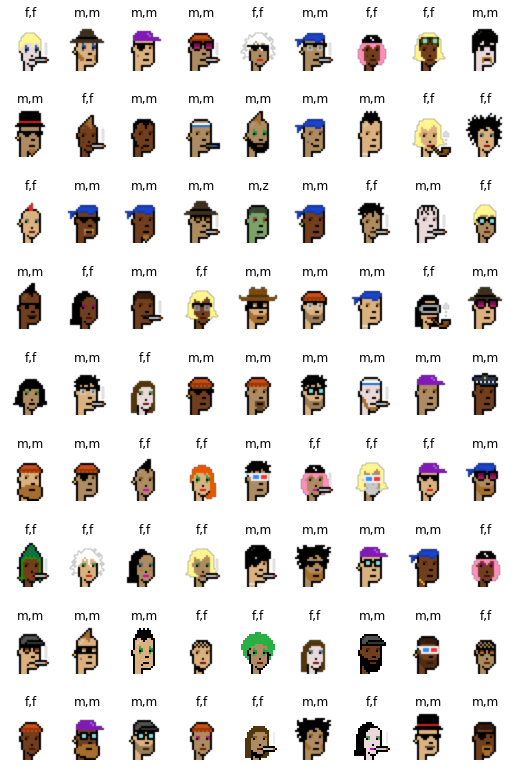

In [46]:
n=9
(x,y) = (n,n)
# create figure
fig = plt.figure(figsize=(9,14))

i=0
for i in range(1,(x*y)+1):
    fig.add_subplot(x, y, i)
    img = testX[i].reshape(24,24,4)
    plt.imshow(img)
    plt.title(f"{predict[i][0]},{test[i][0]}")
    plt.axis('off')
    i=i+1